# url: https://www.takapy.work/entry/2019/02/08/002738

# 主成分分析（PCA）の累積寄与率で見る特徴量エンジニアリング【python】

## 主成分分析（PCA）とは
Principal Component Analysisの略であり、データセットの特徴量を相互に統計的に関連しないように回転する手法です。

回転したあとの特徴量から、データを説明するのに重要な一部の特徴量だけを抜き出すこと（次元圧縮）ができます。また、多くの特徴量を持つデータの可視化にも利用できます。

## 固有値と寄与率と累積寄与率
### 固有値
主成分分析を行うと各主成分に対応した固有値を求めることができます。この固有値は主成分の分散に対応しており、その主成分がどの程度元のデータの情報を保持しているかを表しています。

### 寄与率
ある主成分の固有値が表す情報が、データのすべての情報の中でどの位の割合を占めるかを表します。「主成分軸一つで、データの何割を説明することができているか」を表したものとも言えます。

### 累積寄与率
各主成分の寄与率を大きい順に足しあげていったもので、そこまでの主成分でデータの持っていた情報量がどのくらい説明されているかを示します。

## cancerデータセットで主成分分析
今回はscikit-learnで提供されているcancerデータセットを利用します。



In [1]:
pip install mglearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Breast Cancerデータの読み込み
cancer = load_breast_cancer()

# cancer.dataをDataFrameに変換
X_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## ロジスティック回帰でテスト
主成分分析で次元圧縮する前に、まずはそのまま30個の説明変数を使って、ロジスティック回帰で学習・テストさせて、基準となる精度を出してみます。

## 標準化

In [4]:
# 分散：１にスケーリング
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)
X_scaled = pd.DataFrame(X_scaled, columns = X_df.columns)

In [5]:
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## 学習

In [6]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

# 訓練用と検証用に分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled.values, cancer.target, random_state=0, test_size=0.3)

# ロジスティック回帰で学習
lr = LogisticRegressionCV(cv=10, random_state=0)
lr.fit(X_train, y_train)

# 検証
print('Train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test))))

# テストデータで精度97%というまずまずの結果になりました。

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train score: 0.987
Test score: 0.977
Confustion matrix:
[[ 60   3]
 [  1 107]]


## 主成分分析で寄与率を確認
まずは次元圧縮せず（=特徴量：30のまま）に、寄与率を確認してみます。

<BarContainer object of 30 artists>

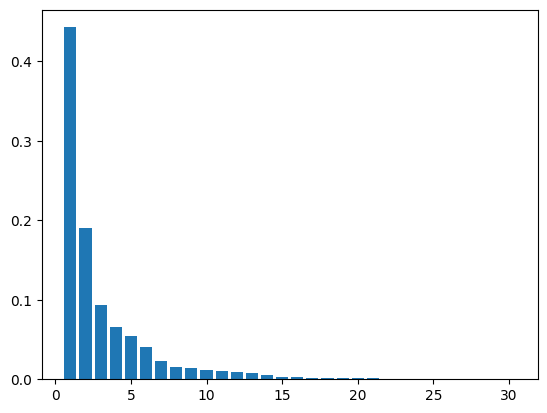

In [7]:
from sklearn.decomposition import PCA

# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=30)
pca.fit(X_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [8]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.44272 0.18971 0.09393 0.06602 0.05496 0.04025 0.02251 0.01589 0.0139
 0.01169 0.0098  0.00871 0.00805 0.00523 0.00314 0.00266 0.00198 0.00175
 0.00165 0.00104 0.001   0.00091 0.00081 0.0006  0.00052 0.00027 0.00023
 0.00005 0.00002 0.     ]


寄与率は、第1主成分で44%、第2主成分で19%、・・・といった値になっており、第4主成分までの累積で80%を超えることがわかります。 主成分分析を次元圧縮に用いる場合、累積寄与率80%の主成分のみを使い、以降の主成分は切り捨てられることが多いようです。

## 2次元まで圧縮してプロット
第2主成分まで次元圧縮(30次元→2次元)して、主成分を軸として散布図にプロットしてみます。

In [9]:
# データの最初の2つの主成分だけを維持
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 最初の２つの主成分に対して、データポイントを変換
X_pca = pca.transform(X_scaled)
print('Original shape: {}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


確かに、2次元まで圧縮されていることがわかります。

プロットしてみます。

Text(0, 0.5, 'Second principal component')

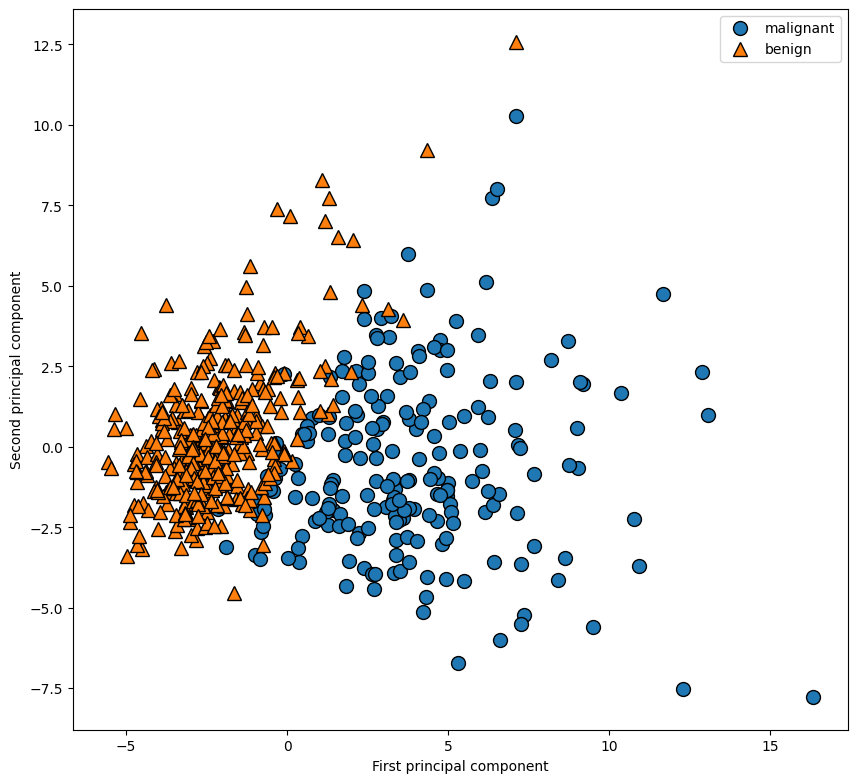

In [10]:
plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

上記からも分かるように、PCAは適切な回転を発見する際にはまったくクラス情報（今回で言うとtargetの悪性/良性）を用いていません。つまり、PCAは教師なし手法であると言えます。

上記の散布図では、2つのクラスが綺麗に分離できていることが見て取れると思います。これならば、線形クラス分類でもそれなりに分類できそうです。

## PCAの欠点
PCAの欠点として、プロットした2つの軸の解釈が難しいことが挙げられます。2つの主成分の方向は元のデータの方向に対応しており、元の特徴量の組み合わせに過ぎませんが、これは一般的に複雑になると言われています。

下記のようにcomponents_を表示することで、主成分を確認することができます。

In [11]:
pca_components_df = pd.DataFrame(data=pca.components_, columns=cancer.feature_names)
pca_components_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


## 主成分分析後のデータでロジスティック回帰
最後に、この第2主成分まで次元圧縮した説明変数を使って学習・テストさせてみます。標準化・次元圧縮・学習と処理が増えたので、Pipelineでまとめて処理を実装しています。

In [12]:
from sklearn.pipeline import Pipeline

# パイプラインの作成
pca_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('decomposition', PCA(n_components=2)),
    ('model', LogisticRegressionCV(cv=10, random_state=0))
])

# 標準化・次元圧縮・学習
pca_pipeline.fit(X_train, y_train)

# 検証
print('Train score: {:.3f}'.format(pca_pipeline.score(X_train, y_train)))
print('Test score: {:.3f}'.format(pca_pipeline.score(X_test, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=pca_pipeline.predict(X_test))))

Train score: 0.962
Test score: 0.930
Confustion matrix:
[[ 58   5]
 [  7 101]]


テストデータの精度で95%となり、全ての説明変数を使った場合と比較して約3ポイント落ちています。しかし、30次元から2次元まで圧縮したことを考えれば、まずまずの精度が得られているのではないでしょうか。

今回は平面にプロットするため、次元数を2まで圧縮しましたが、上記でも述べている通り、主成分分析では累積寄与率80%の主成分のみを使い以降の主成分は切り捨てられることが多いようなので、今回のデータセットの場合はもう少し次元数を増やしても良いかもしれません。

いずれにせよ、PCAを用いて次元圧縮することで、（あまり重要ではない）特徴量を減らすことができ、可視化も行えることが分かりました。

機械学習においてはデータの次元数が大きくなり過ぎると、「次元の呪い」と呼ばれる要因によって効率的に機械学習をさせるのが難しくなります。（計算コスト、過学習、etc）

そういった場合にPCAなどはとても有効となり得そうです。